Zad 1
Program tworzy graf o wierzcholkach A, B, C, D i 4 krawędzi o roznych wagach


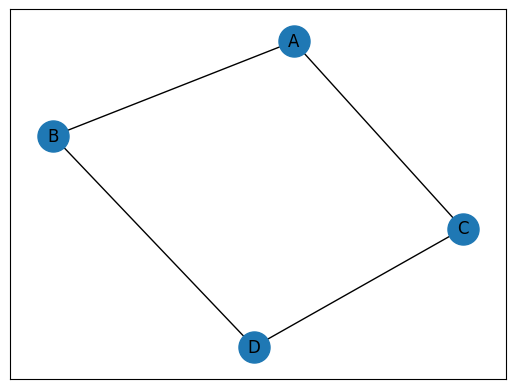

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.show()

Zad 2

Program tworzy i wizualizuje graf z wagami. Graf składa się z 5 wierzchołków i 6 krawędzi. Wagi krawędzi są obliczane jako odległość euklidesowa między współrzędnymi x i y wierzchołków


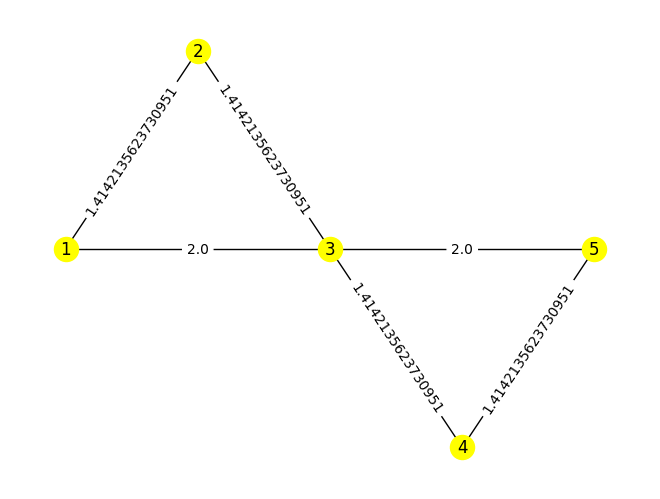

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()
VV = [1, 2, 3, 4, 5]
WW = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 3), (3, 5)]
Vx = {1:0, 2:1, 3:2, 4:3, 5:4}
Vy = {1:0, 2:1, 3:0, 4:-1, 5:0}
g = nx.Graph()
gpos = {}
for v in VV:
  g.add_node(v)
  gpos[v] = [Vx[v], Vy[v]]
for v1 in VV:
  for v2 in VV:
    if (v1, v2) in WW:
      label = str(np.sqrt((Vx[v1] - Vx[v2])**2 + (Vy[v1] - Vy[v2])**2))
      g.add_weighted_edges_from([(v1, v2, label)])
nx.draw(g, gpos, with_labels=True, node_color='yellow')
labels = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, gpos, edge_labels=labels)
plt.show()

Zad 3



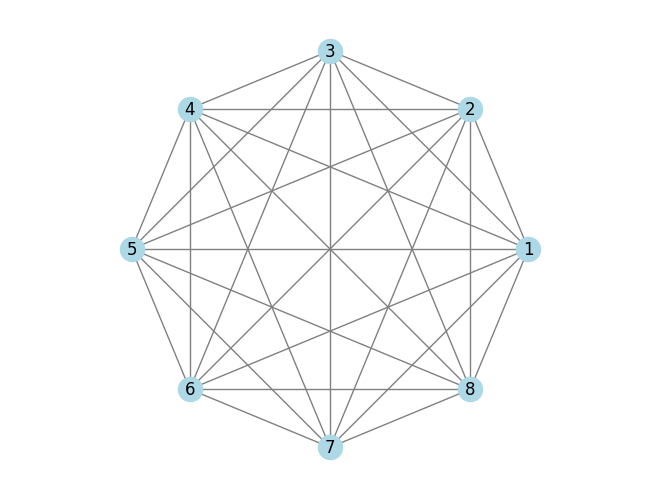

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def umiesc_wierzcholki(n):
    # Obliczanie współrzędnych wierzchołków na okręgu
    kąty = np.linspace(0, 2*np.pi, n, endpoint=False)
    x = np.cos(kąty)
    y = np.sin(kąty)
    return x, y

def rysuj_graf(n):
    G = nx.Graph()
    x, y = umiesc_wierzcholki(n)
    for i in range(n):
        G.add_node(i+1, pos=(x[i], y[i]))
    for i in range(n):
        for j in range(i+1, n):
            G.add_edge(i+1, j+1)
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.axis('equal')
    plt.axis('off')
    plt.show()

n = int(input("Podaj liczbę wierzchołków: "))
rysuj_graf(n)

zad 4

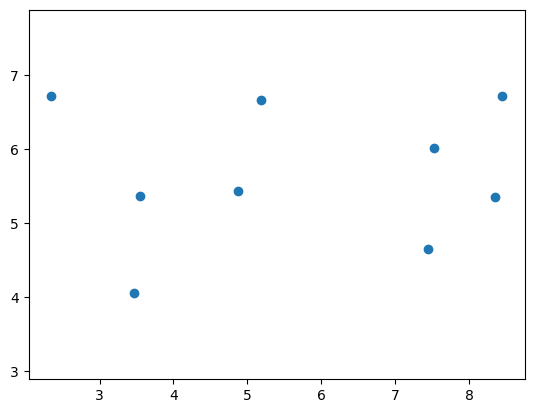

In [14]:
import matplotlib.pyplot as plt
import random

def generuj_wierzcholki(n, x_min, x_max, y_min, y_max):
    wierzcholki = []
    for _ in range(n):
        x = random.uniform(x_min, x_max)
        y = random.uniform(y_min, y_max)
        wierzcholki.append((x, y))
    return wierzcholki

def wyswietl_graf(wierzcholki):
    plt.scatter(*zip(*wierzcholki))
    plt.axis('equal')
    plt.show()

def main():
    n = int(input("Podaj liczbe wierzcholkow: "))
    x_min, x_max = map(float, input("Podaj przedzial na osi Ox (x_min x_max): ").split())
    y_min, y_max = map(float, input("Podaj przedzial na osi Oy (y_min y_max): ").split())
    
    wierzcholki = generuj_wierzcholki(n, x_min, x_max, y_min, y_max)
    wyswietl_graf(wierzcholki)

if __name__ == "__main__":
    main()

zad 5 


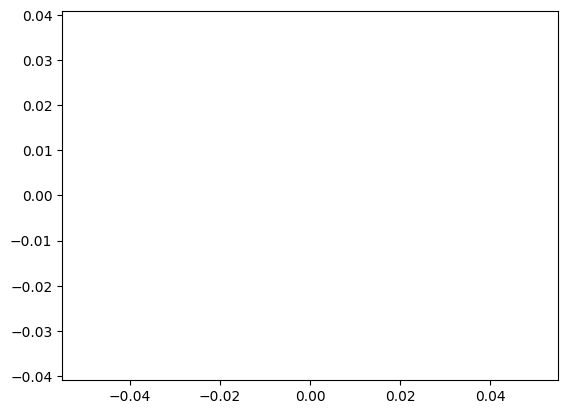

/var/folders/t0/sq_1cnpj20zcbxrp_r9hny540000gn/T/ipykernel_19408/1137908271.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.waitforbuttonpress()


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import random

def generuj_wierzcholki(n, x_min, x_max, y_min, y_max, promien):
    wierzcholki = []
    for _ in range(n):
        for _ in range(10):  # maksymalnie 10 iteracji
            x = random.uniform(x_min, x_max)
            y = random.uniform(y_min, y_max)
            if not czy_zachodzi(wierzcholki, x, y, promien):
                wierzcholki.append((x, y))
                break
        else:
            print("Nie udało się dodać nowego wierzchołka")
            break
    return wierzcholki

def czy_zachodzi(wierzcholki, x, y, promien):
    for wx, wy in wierzcholki:
        if ((x - wx) ** 2 + (y - wy) ** 2) ** 0.5 < 2 * promien:
            return True
    return False

def wyswietl_graf(wierzcholki, promien):
    plt.cla()
    for x, y in wierzcholki:
        circle = plt.Circle((x, y), promien, fill=False)
        plt.gca().add_artist(circle)
    plt.axis('equal')
    plt.draw()
    plt.pause(0.1)

def main():
    n = int(input("Podaj liczbe wierzcholkow: "))
    x_min, x_max = map(float, input("Podaj przedzial na osi Ox (x_min x_max): ").split())
    y_min, y_max = map(float, input("Podaj przedzial na osi Oy (y_min y_max): ").split())
    promien = float(input("Podaj promien kola: "))
    
    wierzcholki = []
    for _ in range(n):
        nowe_wierzcholki = generuj_wierzcholki(1, x_min, x_max, y_min, y_max, promien)
        wierzcholki.extend(nowe_wierzcholki)
        wyswietl_graf(wierzcholki, promien)
        plt.waitforbuttonpress()

if __name__ == "__main__":
    main()